<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="https://www.upm.es/sfs/Rectorado/Gabinete%20del%20Rector/Logos/UPM/Logotipo%20con%20Leyenda/LOGOTIPO%20leyenda%20color%20PNG.png", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 100px; text-align:right;">November 2023</p>
<p style="margin: 0; text-align:right;">Complex data in health</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Lucía Prieto Santamaría</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>

In [11]:
import numpy as np
import pandas as pd

import networkx as nx

import seaborn as sns
import matplotlib.pylab as plt

import localization
import separation
import proximity

# 1. Disease modules

- Disease gene associations

In [12]:
dga = pd.read_csv("../datasets/disease_gene.tsv", sep='\t')

dga = dga[dga.diseaseType == 'disease'][['geneSymbol', 'diseaseName']].drop_duplicates()

dga['diseaseName'] = dga['diseaseName'].str.lower()

num_genes = (dga.groupby('diseaseName')
             .agg('count')
             .sort_values(by='geneSymbol')
             .reset_index()
             .rename(columns={'geneSymbol':'count_genes'}))

filtered_dga = dga.merge(num_genes, 
                         on='diseaseName', 
                         how='inner')

cleaned_dga = filtered_dga[filtered_dga.count_genes>10][['geneSymbol', 'diseaseName']].drop_duplicates().reset_index(drop=True)

- PPIs

In [13]:
ppi = pd.read_csv('../datasets/ppi.csv')

ppi = (ppi[['Symbol_A','Symbol_B']]
       .drop_duplicates()
       .dropna())

gppi = nx.from_pandas_edgelist(ppi, 'Symbol_A', 'Symbol_B')

# Removing self loops
sl = nx.selfloop_edges(gppi)
gppi.remove_edges_from(sl)

In [14]:
def get_disease_module_info(dis_name, gda, ppi):
    
    d = gda[gda.diseaseName == dis_name]
    genes = list(d.geneSymbol.unique())
    genes_in_ppi = [n for n in gppi.nodes if n in genes]
    genes_in_lcc = localization.get_lcc(ppi, genes_in_ppi)
    
    print('Number of disease genes: ',len(genes))
    print('Number of disease genes in the PPI: ',len(genes_in_ppi))
    print('Number of disease genes in the LCC: ',len(genes_in_lcc))
    
    return genes, genes_in_ppi, genes_in_lcc

In [15]:
def plot_disease_module_info(ppi, genes):
    
    sig_dict = localization.get_random_comparison(ppi, genes[1], 1000)
    random_lcc = sig_dict['LCC_list']
    print('Full randomization')
    print('Mean: ',sig_dict['mean'])
    print('Std: ',sig_dict['std'])
    print('z-score: ',sig_dict['z_score'])
    print('p-value: ',sig_dict['p_value'])

    sig_dp_dict = localization.get_random_comparison(ppi, genes[1], 1000, degree_preserving=True)
    random_dp_lcc = sig_dp_dict['LCC_list']
    print('\nDegree preserving randomization')
    print('Mean: ',sig_dp_dict['mean'])
    print('Std: ',sig_dp_dict['std'])
    print('z-score: ',sig_dp_dict['z_score'])
    print('p-value: ',sig_dp_dict['p_value'], '\n')
    
    fig, axs = plt.subplots(1, 2, figsize=(7,3))

    sns.histplot(data=random_lcc,
                 bins=10, 
                 ax=axs[0])
    axs[0].axvline(len(genes[2]), color='r')
    axs[0].set_xlabel('LCC value')
    axs[0].set_ylabel('Count iterations')
    axs[0].set_title('Full randomization')

    sns.histplot(data=random_dp_lcc,
                 bins=10, 
                 ax=axs[1])
    axs[1].axvline(len(genes[2]), color='r')
    axs[1].set_xlabel('LCC value')
    axs[1].set_ylabel('Count iterations')
    axs[1].set_title('Degree preserving randomization')

    plt.tight_layout()
    plt.show()

- Schizophrenia

In [16]:
scz = get_disease_module_info('schizophrenia', cleaned_dga, gppi)

Number of disease genes:  883
Number of disease genes in the PPI:  846
Number of disease genes in the LCC:  683


Full randomization
Mean:  413.23
Std:  35.29497272983789
z-score:  7.643298156508848
p-value:  2.1094237467877974e-14

Degree preserving randomization
Mean:  618.245
Std:  11.735713655334301
z-score:  5.517772664005528
p-value:  3.433231543503723e-08 


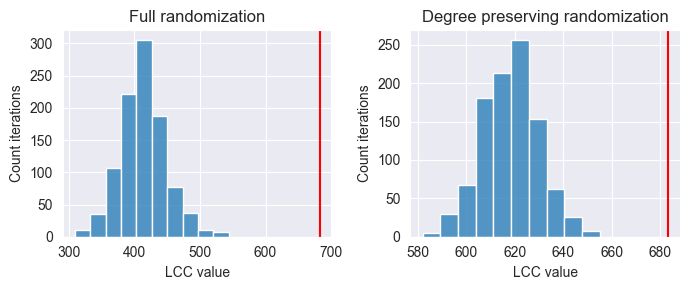

In [17]:
plot_disease_module_info(gppi, scz)

- Autistic Disorder

In [18]:
ad = get_disease_module_info('autistic disorder', cleaned_dga, gppi)

Number of disease genes:  261
Number of disease genes in the PPI:  253
Number of disease genes in the LCC:  118


Full randomization
Mean:  34.465
Std:  20.39947977277852
z-score:  4.094957368053611
p-value:  4.222460779090831e-05

Degree preserving randomization
Mean:  80.7
Std:  9.678119652081183
z-score:  3.8540544383514628
p-value:  0.00011617774577521445 


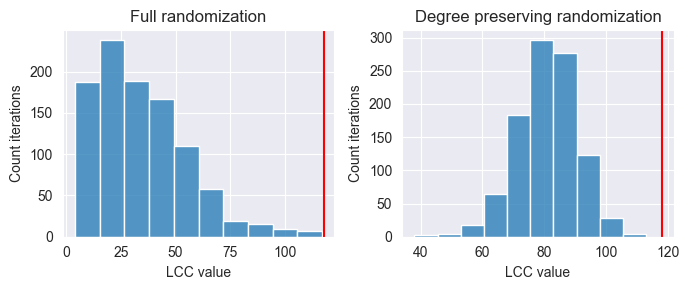

In [19]:
plot_disease_module_info(gppi, ad)

- Obesity

In [20]:
ob = get_disease_module_info('obesity', cleaned_dga, gppi)

Number of disease genes:  205
Number of disease genes in the PPI:  198
Number of disease genes in the LCC:  80


Full randomization
Mean:  17.936
Std:  12.957542359568036
z-score:  4.789797191299248
p-value:  1.6694996445298926e-06

Degree preserving randomization
Mean:  53.124
Std:  7.06446204604427
z-score:  3.8043944216600547
p-value:  0.00014215152499041928 


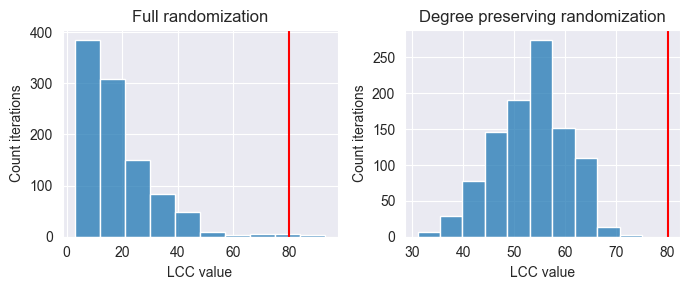

In [21]:
plot_disease_module_info(gppi, ob)

- Hyperlipidemia

In [22]:
hl = get_disease_module_info('hyperlipidemia', cleaned_dga, gppi)

Number of disease genes:  17
Number of disease genes in the PPI:  17
Number of disease genes in the LCC:  5


Full randomization
Mean:  1.228
Std:  0.5079527537084527
z-score:  7.4258874914279875
p-value:  1.1213252548714081e-13

Degree preserving randomization
Mean:  1.729
Std:  0.6629924584789785
z-score:  4.933691112421173
p-value:  8.069001322663638e-07 


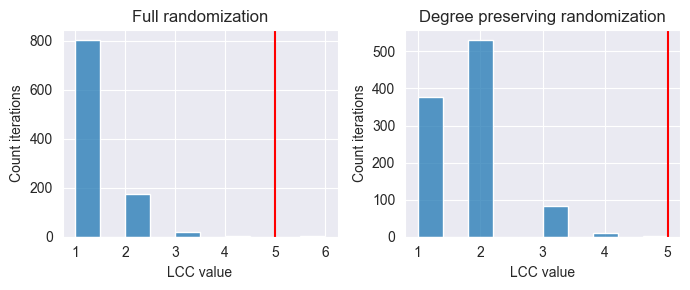

In [23]:
plot_disease_module_info(gppi, hl)

- Rheumatoid Arthritis

In [24]:
ra = get_disease_module_info('rheumatoid arthritis', cleaned_dga, gppi)

Number of disease genes:  174
Number of disease genes in the PPI:  173
Number of disease genes in the LCC:  91


Full randomization
Mean:  13.297
Std:  9.587115885395358
z-score:  8.104940101784912
p-value:  4.440892098500626e-16

Degree preserving randomization
Mean:  42.778
Std:  7.839433397892988
z-score:  6.151209858222748
p-value:  7.689409109445933e-10 


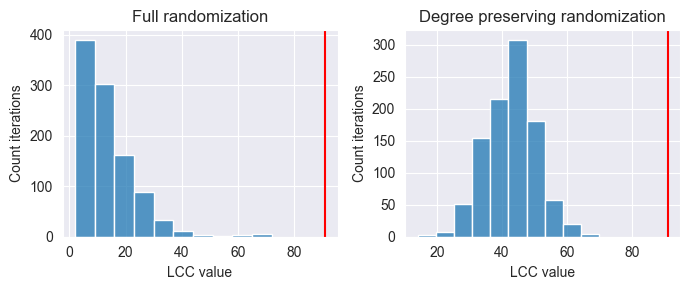

In [25]:
plot_disease_module_info(gppi, ra)

# 2. Disease separation

- To study for example the overlap between diseases and understand better comorbidities

Let's compare Schizophrenia and Autistic Disorder

In [26]:
sab = separation.get_separation(gppi, scz[2], ad[2])

In [27]:
print(sab)

1.2709113607990012


Let's now compare Schizophrenia with Obesity

In [28]:
sab = separation.get_separation(gppi, set(scz[2]), set(ob[2]))

In [29]:
print(sab)

1.4429882044560944


Let's now compare Schizophrenia with Hyperlipidemia

In [30]:
sab = separation.get_separation(gppi, set(scz[2]), set(hl[2]))

In [31]:
print(sab)

2.1061046511627906


Let's now compare Schizophrenia with Rheumatoid Arthritis

In [32]:
sab = separation.get_separation(gppi, set(scz[2]), set(ra[2]))

In [33]:
print(sab)

1.516795865633075


# 3. Disease - drug proximity

- To suggest new drug repurposing opportunities

In [34]:
dt = pd.read_csv('data/drug_target.csv')

cleaned_dt = dt[dt.organism=='Humans'][['Gene_Target', 
                                        'Name']].drop_duplicates()

FileNotFoundError: [Errno 2] No such file or directory: 'data/drug_target.csv'

In [ ]:
def plot_proximity(G, genes, targets, sim):
    
    prox_dict = proximity.get_proximity(G, genes, targets, sim)
    
    prox_obs = prox_dict['proximity']
    random_prox = prox_dict['proximity_list']

    print('Proximity observed: ',prox_obs)
    print('\nMean: ',prox_dict['mean'])
    print('Std: ',prox_dict['std'])
    print('z-score: ',prox_dict['z_score'])
    print('p-value: ',prox_dict['p_value'])


    fig, axs = plt.subplots()
    sns.histplot(data=random_prox,
                 bins=10)
    plt.axvline(prox_obs, color='r')
    plt.xlabel('Proximity value')
    plt.ylabel('Count iterations')
    plt.tight_layout()
    plt.show()

In [ ]:
cleaned_dt[cleaned_dt.Gene_Target.isin(scz[2])][['Name']].drop_duplicates()

In [ ]:
le_t = cleaned_dt[cleaned_dt.Name == 'Lepirudin'].Gene_Target.unique()
print('Lepirudin')
print('\tTargets: ',le_t)

plot_proximity(gppi, 
               set(scz[2]), 
               set(le_t), 
               1000)

In [ ]:
et_t = cleaned_dt[cleaned_dt.Name == 'Etanercept'].Gene_Target.unique()
print('Etanercept')
print('\tTargets: ', et_t)

plot_proximity(gppi, 
               set(scz[2]), 
               set(et_t), 
               1000)